In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('movie_rating.csv')

df.head()



,movie_title,genres,original_release_date,runtime,tomatometer_rating,audience_rating,tomatometer_status,audience_status,tomatometer_count,audience_count
0,Titanic,"Drama, Romance",19/12/1997,195,89,69,Certified-Fresh,Upright,192,35798
1,The Lord of the Rings: The Return of the King,"Action & Adventure, Classics, Science Fiction ...",17/12/2003,200,93,86,Certified-Fresh,Upright,275,34680
2,Spider-Man,"Action & Adventure, Mystery & Suspense, Scienc...",03/05/2002,116,90,67,Certified-Fresh,Upright,245,34297
3,Shrek 2,"Animation, Comedy, Kids & Family, Science Fict...",19/05/2004,92,89,69,Certified-Fresh,Upright,236,34233
4,Harry Potter and the Goblet of Fire,"Action & Adventure, Kids & Family, Science Fic...",18/11/2005,157,88,74,Certified-Fresh,Upright,255,34154


In [21]:
df['rating_difference'] = df['audience_rating'] - df['tomatometer_rating']
df[['movie_title', 'tomatometer_rating', 'audience_rating', 'rating_difference']].head()


,movie_title,tomatometer_rating,audience_rating,rating_difference
0,Titanic,89,69,-20
1,The Lord of the Rings: The Return of the King,93,86,-7
2,Spider-Man,90,67,-23
3,Shrek 2,89,69,-20
4,Harry Potter and the Goblet of Fire,88,74,-14


In [22]:
#positive = audience 
#Negative = criticis

In [23]:
critics_avg = df['tomatometer_rating'].mean()
audience_avg = df['audience_rating'].mean()

critics_avg, audience_avg


(np.float64(70.15333333333334), np.float64(73.58))

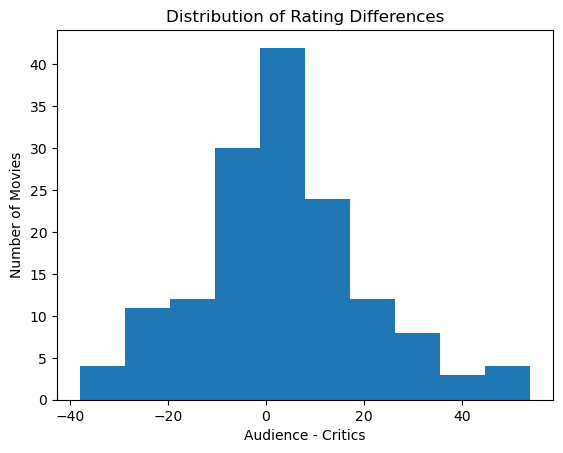

In [24]:
plt.figure()
plt.hist(df['rating_difference'], bins=10)
plt.title('Distribution of Rating Differences')
plt.xlabel('Audience - Critics')
plt.ylabel('Number of Movies')
plt.show()

In [25]:
df_genres = df.assign(genres=df['genres'].str.split(', '))
df_genres = df_genres.explode('genres')

genre_analysis = (
    df_genres
    .groupby('genres')[['tomatometer_rating', 'audience_rating']]
    .mean()
    .sort_values(by='audience_rating', ascending=False)
)

genre_analysis.head(10)


,tomatometer_rating,audience_rating
genres,,
Classics,86.800000,89.600000
Musical & Performing Arts,80.500000,87.750000
Special Interest,64.333333,83.000000
Animation,89.933333,82.200000
Drama,72.740000,77.540000
Action & Adventure,71.972222,75.833333
Kids & Family,76.967742,74.870968
Science Fiction & Fantasy,73.557377,73.836066
Romance,64.190476,72.190476


<function matplotlib.pyplot.show(close=None, block=None)>

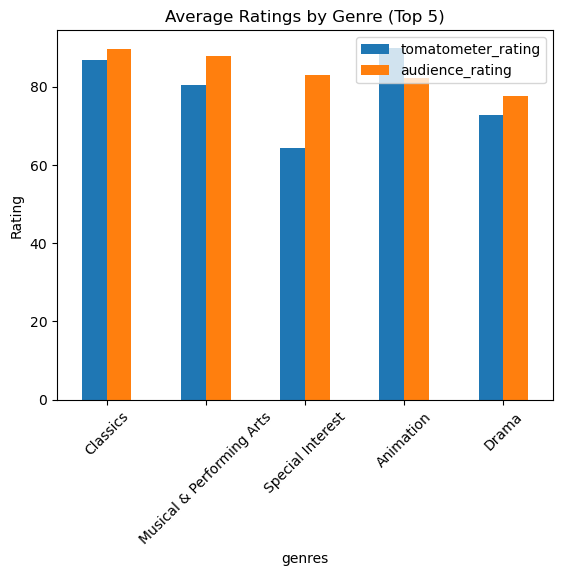

In [26]:
top_genres = genre_analysis.head(5)

top_genres.plot(kind='bar')
plt.title('Average Ratings by Genre (Top 5)')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show

In [27]:
print("Top 10 Movies: Audience Rating Higher than Critics")

df.sort_values(by='rating_difference', ascending=False)[
    ['movie_title', 'tomatometer_rating', 'audience_rating', 'rating_difference']
].head(10)


Top 10 Movies: Audience Rating Higher than Critics


,movie_title,tomatometer_rating,audience_rating,rating_difference
81,I Now Pronounce You Chuck & Larry,15,69,54
143,Gone in 60 Seconds (Gone in Sixty Seconds),25,77,52
47,A Walk to Remember,27,78,51
73,The Ugly Truth,14,60,46
44,A Cinderella Story,12,53,41
28,White Chicks,15,55,40
50,Transformers: Revenge of the Fallen,20,57,37
113,Big Daddy,39,74,35
45,The Notebook,53,85,32
23,The Longest Yard,31,62,31


In [28]:
print("Top 10 Movies: Critics Rating Higher than Audience")

df.sort_values(by='rating_difference', ascending=True)[
    ['movie_title', 'tomatometer_rating', 'audience_rating', 'rating_difference']
].head(10)


Top 10 Movies: Critics Rating Higher than Audience


,movie_title,tomatometer_rating,audience_rating,rating_difference
48,About a Boy,93,55,-38
8,King Kong,84,50,-34
35,War of the Worlds,75,42,-33
36,Charlie and the Chocolate Factory,83,51,-32
22,School of Rock,91,64,-27
38,E.T. The Extra-Terrestrial,98,72,-26
11,Rocky,94,69,-25
80,Indiana Jones and the Kingdom of the Crystal S...,78,54,-24
2,Spider-Man,90,67,-23
37,The Ring,71,48,-23


In [29]:
q1 = df['audience_count'].quantile(1/3)
q2 = df['audience_count'].quantile(2/3)

def engagement_level(x):
    if x >= q2:
        return 'High Engagement'
    elif x >= q1:
        return 'Medium Engagement'
    else:
        return 'Low Engagement'

df['audience_engagement'] = df['audience_count'].apply(engagement_level)

In [30]:
engagement_movies_examples = (
    df.sort_values(by='audience_count', ascending=False)
      .groupby('audience_engagement')
      .head(5)[
          ['audience_engagement', 'movie_title', 'audience_count',
           'tomatometer_rating', 'audience_rating']
      ]
)

engagement_movies_examples

,audience_engagement,movie_title,audience_count,tomatometer_rating,audience_rating
0,High Engagement,Titanic,35798,89,69
1,High Engagement,The Lord of the Rings: The Return of the King,34680,93,86
2,High Engagement,Spider-Man,34297,90,67
3,High Engagement,Shrek 2,34233,89,69
4,High Engagement,Harry Potter and the Goblet of Fire,34154,88,74
50,Medium Engagement,Transformers: Revenge of the Fallen,4082,20,57
51,Medium Engagement,Pirates of the Caribbean: At Worlds End,2738,44,72
52,Medium Engagement,Transformers,2385,58,85
53,Medium Engagement,Shutter Island,2374,68,76
54,Medium Engagement,Harry Potter and the Order of the Phoenix,2334,78,81


In [31]:
engagement_analysis = df.groupby(
    'audience_engagement'
)[[
    'tomatometer_rating',
    'audience_rating'
]].mean()

engagement_analysis


,tomatometer_rating,audience_rating
audience_engagement,,
High Engagement,68.82,65.64
Low Engagement,70.64,78.18
Medium Engagement,71.00,76.92


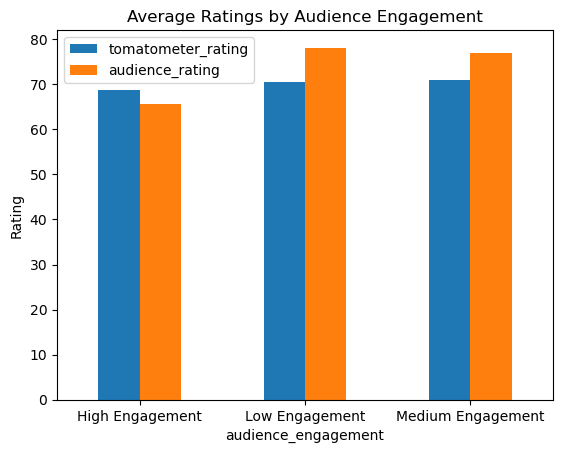

In [32]:
engagement_analysis.plot(kind='bar')
plt.title('Average Ratings by Audience Engagement')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.show()

In [33]:
df['length_category'] = df['runtime'].apply(
    lambda x: 'Short (<100 min)' if x < 100 else 'Long (>=100 min)'
)

length_analysis = df.groupby('length_category')[[
    'tomatometer_rating',
    'audience_rating'
]].mean()

length_analysis


,tomatometer_rating,audience_rating
length_category,,
Long (>=100 min),70.888889,74.256410
Short (<100 min),67.545455,71.181818


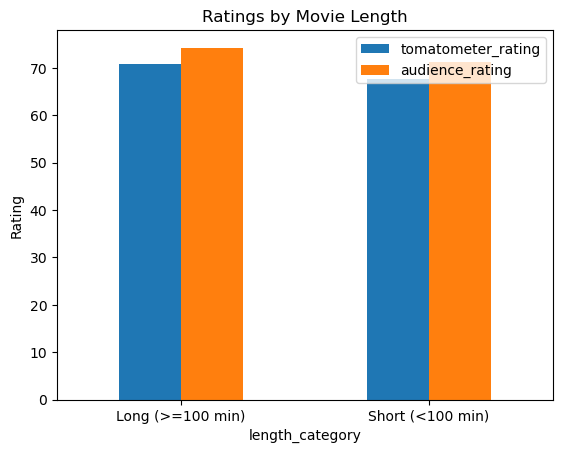

In [34]:
length_analysis.plot(kind='bar')
plt.title('Ratings by Movie Length')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.show()


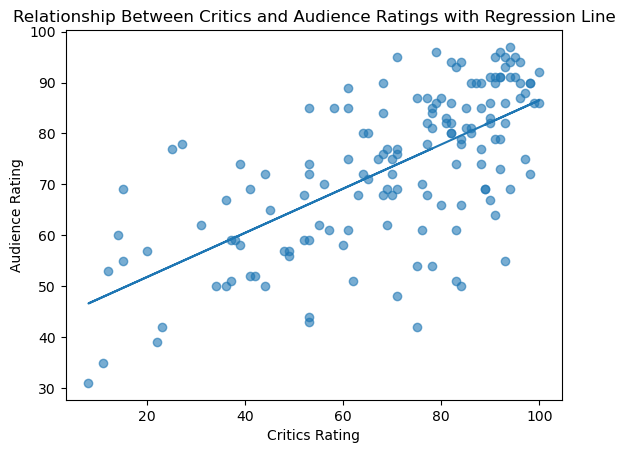

In [35]:
import numpy as np
plt.figure()
plt.scatter(df['tomatometer_rating'], df['audience_rating'], alpha=0.6)

x = df['tomatometer_rating']
y = df['audience_rating']
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

plt.xlabel('Critics Rating')
plt.ylabel('Audience Rating')
plt.title('Relationship Between Critics and Audience Ratings with Regression Line')

plt.show()